In [ ]:
! pip install numpy pandas
! pip install matplotlib

In [5]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [11]:
## A function to load images

def load_images(image_path):
    image = Image.open(image_path).convert('L') ## Converts it into a grayscale
    return np.array(image)

img_dir = './images'
image_files = os.listdir(img_dir) ## Listing all images in the directory 
images = [load_images(os.path.join(img_dir, img)) for img in image_files]

(3936, 2624)


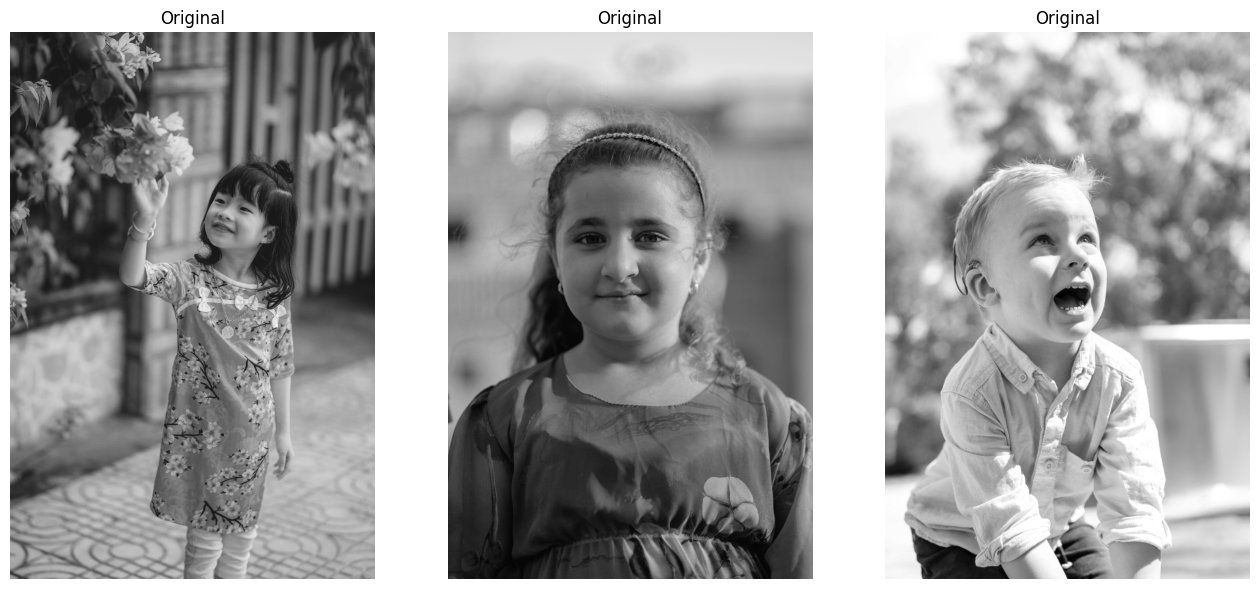

In [4]:
##Display the original images in grayscale
fig, axes = plt.subplots(1, len(images), figsize=(16, 12))

for i, image in enumerate(images):
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title('Original')
    axes[i].axis('off')
plt.show()

In [2]:
# Convolution function
def convolution(image, kernel):
    # We define the kernel size and the image size
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # We are also going to define the output with the same size as input
    output = np.zeros((image_height, image_width))

    # We also define the padding to handle the edges issues
    padd_height = kernel_height // 2
    padd_width = kernel_width // 2
    padded_image = np.pad(
        image, ((padd_height, padd_height), (padd_width, padd_width)), node="constant")

    ## Loop through the kernels and add the the conv kernel with the image kernels
    for i in range(image_height):
        print(f"Pixels-Row: {i}")
        for j in range(image_width):
            print(f"Pixels-Column: {j}")
            ## Getting the region of interest
            region_of_interest = padded_image[i:i+kernel_height, j:j+kernel_width]
            ## We add the kernel and the regions of interest.
            output[i,j] = np.sum(region_of_interest * kernel)
    return output


In [6]:
# getting the kernels (filters) : - Robert, Prewit, and Sobel

# Define Roberts filter kernels
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

# Define Prewitt filter kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Define Sobel filter kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])